In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler




def Scaling(df,columns):
    for col in columns:
        scaler= StandardScaler()
        df[col] = scaler.fit_transform(np.array(df[col].values).reshape(-1,1))
    return df[col]


def replace_nan_with_zero(df,variable):
    df_variables=[variable]
    for i in df_variables:
        df[i].replace(0,np.nan,inplace=True)
        return df[i].isnull().sum()

def return_median(df,variable):   
    temp_df = df[df[variable].notnull()]
    temp_df = temp_df[[variable, 'status_group']].groupby(['status_group'])[[variable]].median().reset_index()
    temp_col = temp_df[variable]
    return temp_col

import pandas as pd
import numpy as np



def installer_cl(df):
    """keep top 10 of installer"""

    if df['installer']=="DWE":
        return 'dwe'
    elif df['installer']=="Government":
        return 'gov'
    elif df['installer']=="RWE":
        return "rwe"
    elif df['installer']=="Commu":
        return"commu"
    elif df['installer']=="DANIDA":
        return"danida"
    elif df['installer']=="KKKT":
        return "kkkt"
    elif df['installer']=="Hesawa":
        return "hesewa"
    elif df['installer']=="0":
        return "unknown"
    elif df['installer']=="TCRS":
        return"tcrs"
    elif df['installer']=="Central government":
        return "central gov" 
    elif df['installer']=="NaN":
        return "nan"
    else:
        return "others"


def funder_cl(df):
    """keep top 10 of installer"""

    if df['funder']=="Government Of Tanzania":
        return 'gov of Tanzania'
    elif df['funder']=="Danida":
        return 'danida'
    elif df["funder"]=="Hesawa":
        return "hesawa"
    elif df['funder']=="Rwssp":
        return"rwssp"
    elif df['funder']=="World Vision":
        return"world vision"
    elif df['funder']=="Unicef":
        return "unicef"
    elif df['funder']=="Hesawa":
        return "hesewa"
    elif df['funder']=="Tasaf":
        return "tasaf"
    elif df['funder']=="District Council":
        return"district council"
    elif df['funder']=="Kkkt":
        return "kkkt" 
    elif df['funder']=="NaN":
        return "nan"
    elif df["funder"]=="0":
        return "unknown"
    else:
        return "others"


def year_cl(df):
    """Construction year grouping"""

    if df["construction_year"]==0:
        return 'unknown'
    elif 1960 <= df["construction_year"]<=1969:
        return "60s"
    elif 1970 <= df["construction_year"]<=1979:
        return "70s"
    elif 1980 <= df["construction_year"]<=1989:
        return "80s"
    elif 1990 <= df["construction_year"]<=1999:
        return "90s"
    elif 2000 <= df["construction_year"]<=2009:
        return "00s"
    elif 2010 <= df["construction_year"]<=2019:
        return "10s"



def pop_cl(df):
    """Population zero or not zero"""

    if df["population"]==0:
        return "1"
    else:
        return "0"


def pay_cl(df):
    """payment never pay , pay or unknown"""

    if df["payment"]=="never pay":
        return "NeverPay"
    elif df["payment"]=="unknown":
        return "Unknown"
    else:
        return "Pay"



















# read csv
df = pd.read_csv("data/Training_set_values.csv")
label = pd.read_csv("data/training_set_labels.csv")

# merge two datasets
df = pd.merge(df,label, on = "id")

# making a new numeric label for classification model
le = preprocessing.LabelEncoder()
le.fit(df["status_group"])
df["label"] =le.transform(df["status_group"])


# Longitude : missing value filled with median
replace_nan_with_zero(df,"longitude")
return_median(df,"longitude")

# Save 
save_it_to_variable = return_median(df,"longitude")

# replace median values with zero value
df.loc[(df['status_group'] == "functional" ) & (df["longitude"].isnull()), "longitude"] = save_it_to_variable[0]
df.loc[(df['status_group'] == "functional needs repair" ) & (df["longitude"].isnull()), "longitude"] = save_it_to_variable[1]
df.loc[(df['status_group'] == "non functional" ) & (df["longitude"].isnull()), "longitude"] = save_it_to_variable[2]


# gps_height : missing value filled with median
replace_nan_with_zero(df,"gps_height")
return_median(df,"gps_height")

# Save 
save_it_to_variable_gps = return_median(df,"gps_height")

# replace median values with zero value
df.loc[(df['status_group'] == "functional" ) & (df["gps_height"].isnull()), "gps_height"] = save_it_to_variable_gps[0]
df.loc[(df['status_group'] == "functional needs repair" ) & (df["gps_height"].isnull()), "gps_height"] = save_it_to_variable_gps[1]
df.loc[(df['status_group'] == "non functional" ) & (df["gps_height"].isnull()), "gps_height"] = save_it_to_variable_gps[2]

# Keep top 10 of funder and installer
df['installer_group'] = df.apply(lambda df: installer_cl(df), axis=1)
df['funder_group'] = df.apply(lambda df: installer_cl(df), axis=1)


# Sorting decades
df['construction_year_new'] = df.apply(lambda df: year_cl(df), axis=1)

# new columns tells if population is  zero or not zero
df["population_zero"] = df.apply(lambda df:pop_cl(df),axis =1)

# new columns tells if payment status is paid, not paid or unknown
df["payment_status"] = df.apply(lambda df:pay_cl(df),axis =1)



# Feature scaling : standarisaton
# list of numeric variables 
columns_list = ["gps_height","population","longitude","latitude"]
Scaling(df,columns_list)

#Remove unnecessary columns 
to_drop = ["funder","installer","payment","payment_type","wpt_name","recorded_by","num_private","extraction_type",
           "extraction_type_group","scheme_management","scheme_name","management",
          "quality_group","quantity_group","source","public_meeting","lga","ward",
           "subvillage","region_code","district_code","date_recorded","id",'label',
           "waterpoint_type_group","permit","construction_year","amount_tsh"]
df.drop(to_drop,inplace= True,axis =1)


# transform Categotical variable to numeric variable
df =pd.get_dummies(df,columns=["basin","region","extraction_type_class","management_group","payment_status","water_quality","quantity","source_type","source_class",
                                            "waterpoint_type","installer_group","construction_year_new","funder_group","population_zero"
                                           ])


df = df[['gps_height','longitude','latitude','population','basin_Internal',
 'basin_Lake Nyasa','basin_Lake Rukwa', 'basin_Lake Tanganyika',
 'basin_Lake Victoria', 'basin_Pangani', 'basin_Rufiji',
 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu', 'region_Arusha',
 'region_Dar es Salaam', 'region_Dodoma', 'region_Iringa', 'region_Kagera',
 'region_Kigoma', 'region_Kilimanjaro', 'region_Lindi', 'region_Manyara',
 'region_Mara', 'region_Mbeya', 'region_Morogoro', 'region_Mtwara',
 'region_Mwanza', 'region_Pwani', 'region_Rukwa' ,'region_Ruvuma',
 'region_Shinyanga', 'region_Singida', 'region_Tabora', 'region_Tanga',
 'extraction_type_class_gravity', 'extraction_type_class_handpump',
 'extraction_type_class_motorpump', 'extraction_type_class_other',
 'extraction_type_class_rope pump' ,'extraction_type_class_submersible',
 'extraction_type_class_wind-powered', 'management_group_commercial',
 'management_group_other', 'management_group_parastatal',
 'management_group_unknown' ,'management_group_user-group',
 'payment_status_NeverPay', 'payment_status_Pay', 'payment_status_Unknown',
 'water_quality_coloured', 'water_quality_fluoride',
 'water_quality_fluoride abandoned', 'water_quality_milky',
 'water_quality_salty', 'water_quality_salty abandoned',
 'water_quality_soft', 'water_quality_unknown', 'quantity_dry',
 'quantity_enough', 'quantity_insufficient', 'quantity_seasonal',
 'quantity_unknown', 'source_type_borehole', 'source_type_dam',
 'source_type_other' ,'source_type_rainwater harvesting',
 'source_type_river/lake', 'source_type_shallow well', 'source_type_spring',
 'source_class_groundwater', 'source_class_surface', 'source_class_unknown',
 'waterpoint_type_cattle trough', 'waterpoint_type_communal standpipe',
 'waterpoint_type_communal standpipe multiple', 'waterpoint_type_dam',
 'waterpoint_type_hand pump', 'waterpoint_type_improved spring',
 'waterpoint_type_other' ,'installer_group_central gov',
 'installer_group_commu', 'installer_group_danida', 'installer_group_dwe',
 'installer_group_gov', 'installer_group_hesewa', 'installer_group_kkkt',
 'installer_group_others', 'installer_group_rwe', 'installer_group_tcrs',
 'installer_group_unknown' ,'construction_year_new_00s',
 'construction_year_new_10s', 'construction_year_new_60s',
 'construction_year_new_70s', 'construction_year_new_80s',
 'construction_year_new_90s', 'construction_year_new_unknown',
 'funder_group_central gov', 'funder_group_commu' ,'funder_group_danida',
 'funder_group_dwe', 'funder_group_gov', 'funder_group_hesewa',
 'funder_group_kkkt', 'funder_group_others', 'funder_group_rwe',
 'funder_group_tcrs', 'funder_group_unknown', 'population_zero_0',
 'population_zero_1',"status_group"]]

# MOMO
# do something with missing data ( gps, popluration, water amount)


In [6]:

df.columns = [c.replace(' ', '_') for c in df.columns]

In [8]:
df.columns

Index(['gps_height', 'longitude', 'latitude', 'population', 'basin_Internal',
       'basin_Lake_Nyasa', 'basin_Lake_Rukwa', 'basin_Lake_Tanganyika',
       'basin_Lake_Victoria', 'basin_Pangani',
       ...
       'funder_group_gov', 'funder_group_hesewa', 'funder_group_kkkt',
       'funder_group_others', 'funder_group_rwe', 'funder_group_tcrs',
       'funder_group_unknown', 'population_zero_0', 'population_zero_1',
       'status_group'],
      dtype='object', length=111)

In [10]:
df.to_csv("data/resampled_tanzania_cleaned_df.csv",index=False)

In [11]:
df = pd.read_csv("data/resampled_tanzania_cleaned_df.csv")
df.shape

(59400, 111)

In [13]:
# Feature selection 
X = df.iloc[0:59400,0:110]
y= df[['status_group']]

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

import scikitplot as skplt




Using TensorFlow backend.
C:\Users\yuka\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yuka\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yuka\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\yuka\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529

In [2]:
df = pd.read_csv("data/resampled_tanzania_cleaned_df.csv")
df.shape

(59400, 111)

In [3]:
# Feature selection 
X = df.iloc[0:59400,0:110]
y= df[['status_group']]

In [4]:
GBC = GradientBoostingClassifier()
RFC =RandomForestClassifier()
svc =SVC()
XGB = XGBClassifier()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [6]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

47520
47520
11880
11880


# 1. Baseline model + Train test split cross validation

In [8]:
def modeling(clf,X_train,y_train,X_test,y_test):
    """returns train a model and return model's accuracy and F1_macro"""
    
    clf.fit(X_train,y_train)
    y_pred =clf.predict(X_test)
    clf_report = classification_report(y_test,y_pred)
    clf_acc_score = accuracy_score(y_test, y_pred)
    f1score=f1_score(y_test, y_pred, average='macro')
    return  clf_report, clf_acc_score, f1score
    print(clf_report)

In [9]:
XGB =XGBClassifier()
XGB_clf_report, XGB_clf_acc_score, XGB_f1score = modeling(XGB,X_train,y_train,X_test,y_test)

C:\Users\yuka\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yuka\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
print(XGB_clf_report)

                         precision    recall  f1-score   support

             functional       0.85      0.94      0.89      6457
functional needs repair       0.86      0.53      0.65       851
         non functional       0.90      0.83      0.87      4572

               accuracy                           0.87     11880
              macro avg       0.87      0.77      0.80     11880
           weighted avg       0.87      0.87      0.87     11880



# 2 Gridsearch hyperparamters + kfold Cross validation( XGB ) 


In [14]:
kf = KFold(n_splits=5, random_state=42, shuffle=False)

C:\Users\yuka\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [17]:
params_xgb = {#'n_estimators': [300],
               'max_depth': [6,10],
               #'validate_parameters': [True],
               #'min_child_weight': [1],
               #'gamma':[ 0.0, 0.1],
               #'learning_rate':[0.2,0.3],
               'colsample_bytree':[0.3,0.5]}

In [18]:
grid_no_up = GridSearchCV(XGB, param_grid=params_xgb, cv=kf, 
                          scoring='f1_macro').fit(X_train, y_train)

In [20]:
grid_no_up.best_score_

0.8146308875577202

In [19]:
grid_no_up.best_params_

{'colsample_bytree': 0.5, 'max_depth': 10}

In [21]:
f1_score(y_test, grid_no_up.predict(X_test),average='macro')

0.8131696751523098

In [102]:
grid_no_up.cv_results_

{'mean_fit_time': array([21.74479165, 34.45524726, 31.81557436, 44.30513024]),
 'std_fit_time': array([0.26570428, 0.78448338, 1.75217002, 1.53070179]),
 'mean_score_time': array([0.29721785, 0.36963949, 0.3304399 , 0.33654785]),
 'std_score_time': array([0.0042094 , 0.04510184, 0.04153105, 0.0175938 ]),
 'param_colsample_bytree': masked_array(data=[0.3, 0.3, 0.5, 0.5],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[6, 10, 6, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'colsample_bytree': 0.3, 'max_depth': 6},
  {'colsample_bytree': 0.3, 'max_depth': 10},
  {'colsample_bytree': 0.5, 'max_depth': 6},
  {'colsample_bytree': 0.5, 'max_depth': 10}],
 'split0_test_score': array([0.80437969, 0.8105608 , 0.80684146, 0.81621662]),
 'split1_test_score': array([0.81718894, 0.82361923, 0.81736031, 0.82152457]),
 'split2_test_score'

In [104]:
params_xgb2 = {'n_estimators':[100,1000],
               'max_depth': [10],
               #'validate_parameters': [True],
               #'min_child_weight': [1],
               'gamma':[ 0.0, 0.5],
               #'learning_rate':[0.2,0.3],
               'colsample_bytree':[0.5]}

In [105]:
grid_no_up2 = GridSearchCV(XGB, param_grid=params_xgb2, cv=kf, 
                          scoring='f1_macro').fit(X_train, y_train)

C:\Users\yuka\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yuka\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
grid_no_up2.best_score_

0.8153950346226857

In [107]:
grid_no_up2.best_params_

{'colsample_bytree': 0.5, 'gamma': 0.5, 'max_depth': 10, 'n_estimators': 100}

In [108]:
f1_score(y_test, grid_no_up2.predict(X_test),average='macro')

0.8115844467832604

In [109]:
grid_no_up2.cv_results_

{'mean_fit_time': array([ 47.21004725, 508.41393132,  49.32119079, 528.40292759]),
 'std_fit_time': array([ 2.82120964, 19.21575892,  0.79906022, 17.34247052]),
 'mean_score_time': array([0.34926753, 2.92683244, 0.35116353, 1.36562924]),
 'std_score_time': array([0.02302975, 0.20456868, 0.00682318, 0.52954108]),
 'param_colsample_bytree': masked_array(data=[0.5, 0.5, 0.5, 0.5],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.0, 0.0, 0.5, 0.5],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[10, 10, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 1000, 100, 1000],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'colsample_bytree': 0.5,


# 3 Make a function to Generate Reampling X_train y_train + Cross validation (F1_macro) :  (turned hyperparameters)

In [37]:

def resampled_cross_val(model, params, cv=None):
    """
    Creates folds manually, and upsamples within each fold.
    Returns an array of validation f1_macro scores
    """
    if cv is None:
        cv = KFold(n_splits=5, random_state=42)

    smoter = SMOTE(random_state=42)
    
    f1_macro_scores = []
    for train_fold_index, val_fold_index in KFold(n_splits=5, random_state=42).split(X_train, y_train):
        # Get the training data
        X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train.iloc[train_fold_index]
        # Get the validation data
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train.iloc[val_fold_index]
        
         # Upsample only the data in the training section
        X_train_upsampled, y_train_upsampled = smoter.fit_resample(X_train_fold,
                                                                           y_train_fold)
         # Fit the model on the upsampled training data
        model_upsample = model(**params).fit(X_train_upsampled,  y_train_upsampled)
        # Score the model on the (non-upsampled) validation data
        f1_macro_score = f1_score(y_val_fold, model_upsample.predict(X_val_fold),average='micro')
        f1_macro_scores.append(f1_macro_score)
        f1_macro_score_mean=f1_macro_score.mean()
        f1_macro_array_scores = np.array(f1_macro_scores)
        

    return X_train_upsampled,y_train_upsampled,f1_macro_array_scores,f1_macro_score_mean



# 3.2 Reampling X_train y_train + Cross validation (Turned XGB hyperparameters)

In [35]:
# PASS THE OPTIMISED PARAMS

gridsearched_params_xgb = {'max_depth':10,'colsample_bytree':0.5}

In [38]:
X_train_upsampled,y_train_upsampled,f1_macro_array_scores_xgb_r,f1_macro_score_mean_xgb_r = resampled_cross_val(XGBClassifier, gridsearched_params_xgb , cv=kf)

C:\Users\yuka\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\yuka\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yuka\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yuka\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

In [42]:
f1_macro_array_scores_xgb_r

array([0.8655303 , 0.8694234 , 0.86153199, 0.86931818, 0.8672138 ])

In [43]:
f1_macro_score_mean_xgb_r

0.8672138047138047

# 3.3 Check and Save :  Resampled data size and count its value

In [39]:
X_train_upsampled

,gps_height,longitude,latitude,population,basin_Internal,basin_Lake_Nyasa,basin_Lake_Rukwa,basin_Lake_Tanganyika,basin_Lake_Victoria,basin_Pangani,...,funder_group_dwe,funder_group_gov,funder_group_hesewa,funder_group_kkkt,funder_group_others,funder_group_rwe,funder_group_tcrs,funder_group_unknown,population_zero_0,population_zero_1
0,2.045055,0.110766,0.501897,-0.042229,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.373597,0.143490,-0.006287,-0.381587,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,-0.126055,-1.028468,-1.145688,-0.381587,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,-0.126055,-0.420876,-1.060482,-0.381587,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-0.074504,0.736288,-0.113630,-0.127068,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61954,-0.126055,1.437858,0.280064,0.176710,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
61955,-0.126055,-0.877940,-1.167614,-0.381587,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
61956,-0.126055,-0.844502,-1.203330,-0.381587,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
61957,-2.019432,1.499206,-0.576637,0.508375,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [40]:
y_train_upsampled

,status_group
0,functional
1,functional
2,non functional
3,non functional
4,non functional
...,...
61954,non functional
61955,non functional
61956,non functional
61957,non functional


In [41]:
y_train_upsampled.status_group.value_counts()

functional needs repair    20653
functional                 20653
non functional             20653
Name: status_group, dtype: int64

In [58]:
# Save
X_train_upsampled.to_csv("data/X_train_upsampled.csv")
X_train_upsampled = pd.read_csv("data/X_train_upsampled.csv")
X_train_upsampled

,Unnamed: 0,gps_height,longitude,latitude,population,basin_Internal,basin_Lake_Nyasa,basin_Lake_Rukwa,basin_Lake_Tanganyika,basin_Lake_Victoria,...,funder_group_dwe,funder_group_gov,funder_group_hesewa,funder_group_kkkt,funder_group_others,funder_group_rwe,funder_group_tcrs,funder_group_unknown,population_zero_0,population_zero_1
0,0,2.045055,0.110766,0.501897,-0.042229,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0.373597,0.143490,-0.006287,-0.381587,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,-0.126055,-1.028468,-1.145688,-0.381587,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,3,-0.126055,-0.420876,-1.060482,-0.381587,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,4,-0.074504,0.736288,-0.113630,-0.127068,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61954,61954,-0.126055,1.437858,0.280064,0.176710,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
61955,61955,-0.126055,-0.877940,-1.167614,-0.381587,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
61956,61956,-0.126055,-0.844502,-1.203330,-0.381587,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
61957,61957,-2.019432,1.499206,-0.576637,0.508375,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [59]:
# Save
y_train_upsampled.to_csv("data/y_train_upsampled.csv")
y_train_upsampled = pd.read_csv("data/y_train_upsampled.csv")
y_train_upsampled

,Unnamed: 0,status_group
0,0,functional
1,1,functional
2,2,non functional
3,3,non functional
4,4,non functional
...,...,...
61954,61954,non functional
61955,61955,non functional
61956,61956,non functional
61957,61957,non functional


In [61]:
df_r = pd.merge(X_train_upsampled,y_train_upsampled,how="left",on="Unnamed: 0")
df_r

,Unnamed: 0,gps_height,longitude,latitude,population,basin_Internal,basin_Lake_Nyasa,basin_Lake_Rukwa,basin_Lake_Tanganyika,basin_Lake_Victoria,...,funder_group_gov,funder_group_hesewa,funder_group_kkkt,funder_group_others,funder_group_rwe,funder_group_tcrs,funder_group_unknown,population_zero_0,population_zero_1,status_group
0,0,2.045055,0.110766,0.501897,-0.042229,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,functional
1,1,0.373597,0.143490,-0.006287,-0.381587,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,functional
2,2,-0.126055,-1.028468,-1.145688,-0.381587,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,non functional
3,3,-0.126055,-0.420876,-1.060482,-0.381587,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,non functional
4,4,-0.074504,0.736288,-0.113630,-0.127068,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61954,61954,-0.126055,1.437858,0.280064,0.176710,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,non functional
61955,61955,-0.126055,-0.877940,-1.167614,-0.381587,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,non functional
61956,61956,-0.126055,-0.844502,-1.203330,-0.381587,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,non functional
61957,61957,-2.019432,1.499206,-0.576637,0.508375,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,non functional


In [62]:
to_drop =["Unnamed: 0"]
df_r.drop(to_drop,inplace= True,axis =1)

In [63]:
df_r

,gps_height,longitude,latitude,population,basin_Internal,basin_Lake_Nyasa,basin_Lake_Rukwa,basin_Lake_Tanganyika,basin_Lake_Victoria,basin_Pangani,...,funder_group_gov,funder_group_hesewa,funder_group_kkkt,funder_group_others,funder_group_rwe,funder_group_tcrs,funder_group_unknown,population_zero_0,population_zero_1,status_group
0,2.045055,0.110766,0.501897,-0.042229,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,functional
1,0.373597,0.143490,-0.006287,-0.381587,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,functional
2,-0.126055,-1.028468,-1.145688,-0.381587,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,non functional
3,-0.126055,-0.420876,-1.060482,-0.381587,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,non functional
4,-0.074504,0.736288,-0.113630,-0.127068,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61954,-0.126055,1.437858,0.280064,0.176710,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,non functional
61955,-0.126055,-0.877940,-1.167614,-0.381587,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,non functional
61956,-0.126055,-0.844502,-1.203330,-0.381587,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,non functional
61957,-2.019432,1.499206,-0.576637,0.508375,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,non functional


In [64]:
# save 

df_r.to_csv("data/df_resampled.csv",index=False)
df_r = pd.read_csv("data/df_resampled.csv")
df_r

,gps_height,longitude,latitude,population,basin_Internal,basin_Lake_Nyasa,basin_Lake_Rukwa,basin_Lake_Tanganyika,basin_Lake_Victoria,basin_Pangani,...,funder_group_gov,funder_group_hesewa,funder_group_kkkt,funder_group_others,funder_group_rwe,funder_group_tcrs,funder_group_unknown,population_zero_0,population_zero_1,status_group
0,2.045055,0.110766,0.501897,-0.042229,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,functional
1,0.373597,0.143490,-0.006287,-0.381587,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,functional
2,-0.126055,-1.028468,-1.145688,-0.381587,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,non functional
3,-0.126055,-0.420876,-1.060482,-0.381587,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,non functional
4,-0.074504,0.736288,-0.113630,-0.127068,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61954,-0.126055,1.437858,0.280064,0.176710,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,non functional
61955,-0.126055,-0.877940,-1.167614,-0.381587,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,non functional
61956,-0.126055,-0.844502,-1.203330,-0.381587,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,non functional
61957,-2.019432,1.499206,-0.576637,0.508375,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,non functional


In [76]:
# Split X and y 

X_train_resampled = df_r.iloc[0:61959,0:110]
y_train_resampled = df_r[["status_group"]]


In [77]:
print(len(X_train_resampled))
print(len(y_train_resampled))
print(len(X_test))
print(len(y_test))

61959
61959
11880
11880


# 5 Visualise confusion matrix (XGB) 

# 5.2 Define a function

In [70]:
def modeling(clf,X_train_resampled,y_train_resampled,X_test,y_test):
    "Fit a model, return classification report, accuracy, F1_macro scores"
    clf.fit(X_train_resampled,y_train_resampled)
    y_pred =clf.predict(X_test)
    clf_report = classification_report(y_test,y_pred)
    clf_acc_score = accuracy_score(y_test, y_pred)
    f1score=f1_score(y_test, y_pred, average='macro')
    return  clf_report, clf_acc_score, f1score
    print(clf_report)

# Check current model's parameters

In [65]:
from pprint import pprint
pprint(XGB.get_params())

{'base_score': 0.5,
 'booster': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'objective': 'multi:softprob',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': None,
 'validate_parameters': False,
 'verbosity': None}


In [67]:
XGB

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

# PASSS THE OPTIMISED PARAMS

In [71]:
XGB =XGBClassifier(max_depth=10,colsample_bytree=0.5)

In [78]:
XGB_clf_report_r, XGB_clf_acc_score_r, XGB_f1score_R = modeling(XGB,X_train_resampled,y_train_resampled,X_test,y_test)

In [79]:
y_pred =XGB.predict(X_test)

In [80]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

                         precision    recall  f1-score   support

             functional       0.88      0.90      0.89      6457
functional needs repair       0.61      0.64      0.62       851
         non functional       0.89      0.86      0.87      4572

               accuracy                           0.86     11880
              macro avg       0.79      0.80      0.80     11880
           weighted avg       0.86      0.86      0.86     11880

0.8628787878787879


In [126]:
XGB2 =XGBClassifier(max_depth=6,colsample_bytree=1,gamma=0,n_estimators=100,booster="gbtree",objective="multi:softmax",num_class=3) #booster="gbtree" #'objective="multi:softmax",num_class=3
XGB_clf_report_r2, XGB_clf_acc_score_r2, XGB_f1score_r2 = modeling(XGB2,X_train_resampled,y_train_resampled,X_test,y_test)
y_pred2 =XGB2.predict(X_test)

In [127]:
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test, y_pred2))

                         precision    recall  f1-score   support

             functional       0.88      0.88      0.88      6457
functional needs repair       0.54      0.69      0.60       851
         non functional       0.89      0.84      0.86      4572

               accuracy                           0.85     11880
              macro avg       0.77      0.80      0.78     11880
           weighted avg       0.86      0.85      0.85     11880

0.8487373737373738


In [88]:
print(XGB_clf_report)

                         precision    recall  f1-score   support

             functional       0.85      0.94      0.89      6457
functional needs repair       0.86      0.53      0.65       851
         non functional       0.90      0.83      0.87      4572

               accuracy                           0.87     11880
              macro avg       0.87      0.77      0.80     11880
           weighted avg       0.87      0.87      0.87     11880



In [81]:
xgb_confusion_matrix_ =confusion_matrix(y_test,y_pred)
xgb_confusion_matrix_

array([[5796,  245,  416],
       [ 229,  545,   77],
       [ 559,  103, 3910]], dtype=int64)

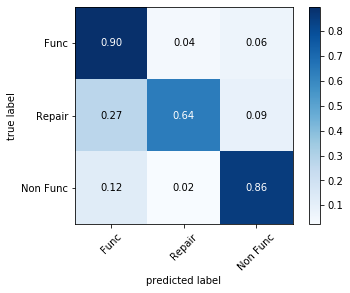

In [82]:
class_names = ["Func","Repair","Non Func"]
fig,ax =plot_confusion_matrix(conf_mat = xgb_confusion_matrix_,colorbar = True,
                             show_absolute=False, show_normed=True,
                             class_names = class_names)
plt.show()

# 5 visualise ROC and AUC chart   (XGB)

In [83]:
predicted_probas = XGB.predict_proba(X_test)

In [84]:
print(predicted_probas.shape)
predicted_probas

(11880, 3)


array([[8.3427904e-06, 6.9302687e-06, 9.9998474e-01],
       [9.9975687e-01, 8.2901082e-05, 1.6024546e-04],
       [6.0875559e-01, 2.9950753e-01, 9.1736898e-02],
       ...,
       [2.2373468e-05, 1.3787219e-05, 9.9996388e-01],
       [2.4912968e-01, 7.3385701e-02, 6.7748457e-01],
       [6.7058712e-01, 2.6683617e-01, 6.2576771e-02]], dtype=float32)

In [85]:
print(y_test.shape)
y_test

(11880, 1)


,status_group
2980,non functional
5246,functional
22659,functional
39888,non functional
13361,functional
...,...
17841,functional
20222,functional
40219,non functional
19599,functional


In [86]:
y_test_arr = np.ravel(y_test)
print(y_test_arr.shape)
y_test_arr

(11880,)


array(['non functional', 'functional', 'functional', ...,
       'non functional', 'functional', 'functional'], dtype=object)

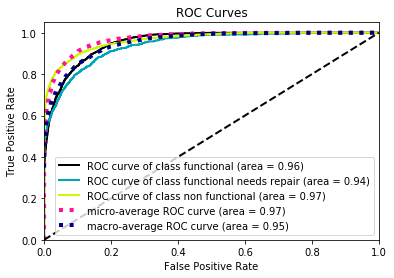

In [87]:
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

# Repeat the process for 3 other models 

# Table of modes' performace 


# Sumission 

https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/#sub_values

In [94]:
sub_test = pd.read_csv("data/competition/test_set_values.csv")
sub_test

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [99]:
y_pred_sub =XGB.predict(sub_test)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields date_recorded, funder, installer, wpt_name, basin, subvillage, region, lga, ward, public_meeting, recorded_by, scheme_management, scheme_name, permit, extraction_type, extraction_type_group, extraction_type_class, management, management_group, payment, payment_type, water_quality, quality_group, quantity, quantity_group, source, source_type, source_class, waterpoint_type, waterpoint_type_group

In [ ]:

clf.fit(x, y)
y_pred = clf.predict(test_data_cleaned)

test_data_cleaned['prediction'] = y_pred

In [96]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

def Scaling(df,columns):
    for col in columns:
        scaler= StandardScaler()
        df[col] = scaler.fit_transform(np.array(df[col].values).reshape(-1,1))
    return df[col]


def replace_nan_with_zero(df,variable):
    df_variables=[variable]
    for i in df_variables:
        df[i].replace(0,np.nan,inplace=True)
        return df[i].isnull().sum()

def return_median(df,variable):   
    temp_df = df[df[variable].notnull()]
    temp_df = temp_df[[variable, 'status_group']].groupby(['status_group'])[[variable]].median().reset_index()
    temp_col = temp_df[variable]
    return temp_col

In [97]:
def installer_cl(df):
    """keep top 10 of installer"""

    if df['installer']=="DWE":
        return 'dwe'
    elif df['installer']=="Government":
        return 'gov'
    elif df['installer']=="RWE":
        return "rwe"
    elif df['installer']=="Commu":
        return"commu"
    elif df['installer']=="DANIDA":
        return"danida"
    elif df['installer']=="KKKT":
        return "kkkt"
    elif df['installer']=="Hesawa":
        return "hesewa"
    elif df['installer']=="0":
        return "unknown"
    elif df['installer']=="TCRS":
        return"tcrs"
    elif df['installer']=="Central government":
        return "central gov" 
    elif df['installer']=="NaN":
        return "nan"
    else:
        return "others"
    
    
    
def funder_cl(df):
    """keep top 10 of installer"""

    if df['funder']=="Government Of Tanzania":
        return 'gov of Tanzania'
    elif df['funder']=="Danida":
        return 'danida'
    elif df["funder"]=="Hesawa":
        return "hesawa"
    elif df['funder']=="Rwssp":
        return"rwssp"
    elif df['funder']=="World Vision":
        return"world vision"
    elif df['funder']=="Unicef":
        return "unicef"
    elif df['funder']=="Hesawa":
        return "hesewa"
    elif df['funder']=="Tasaf":
        return "tasaf"
    elif df['funder']=="District Council":
        return"district council"
    elif df['funder']=="Kkkt":
        return "kkkt" 
    elif df['funder']=="NaN":
        return "nan"
    elif df["funder"]=="0":
        return "unknown"
    else:
        return "others"


def year_cl(df):
    """Construction year grouping"""

    if df["construction_year"]==0:
        return 'unknown'
    elif 1960 <= df["construction_year"]<=1969:
        return "60s"
    elif 1970 <= df["construction_year"]<=1979:
        return "70s"
    elif 1980 <= df["construction_year"]<=1989:
        return "80s"
    elif 1990 <= df["construction_year"]<=1999:
        return "90s"
    elif 2000 <= df["construction_year"]<=2009:
        return "00s"
    elif 2010 <= df["construction_year"]<=2019:
        return "10s"



def pop_cl(df):
    """Population zero or not zero"""

    if df["population"]==0:
        return "1"
    else:
        return "0"


def pay_cl(df):
    """payment never pay , pay or unknown"""

    if df["payment"]=="never pay":
        return "NeverPay"
    elif df["payment"]=="unknown":
        return "Unknown"
    else:
        return "Pay"


In [98]:

# Longitude : missing value filled with median
replace_nan_with_zero(sub_test,"longitude")
return_median(sub_test,"longitude")


KeyError: "['status_group'] not in index"